In [1]:
!pip install opencv-python
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
df = pd.read_csv('icml_face_data.csv')
df.head(5)

,emotion,usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
df.dtypes

emotion     int64
usage      object
 pixels    object
dtype: object

In [5]:
df.drop(['usage'],inplace=True, axis=1)

In [6]:
df.head(5)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [7]:
df.shape

(35887, 2)

In [8]:
df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)
df.head(5)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [10]:
df.shape

(34094, 2)

In [11]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [12]:
df1 = df['emotion']
df1.head(10)

0    0
1    0
2    2
3    4
4    6
5    2
6    4
7    3
8    3
9    2
Name: emotion, dtype: int64

In [13]:
df2 = df.drop('emotion', axis=1)
df2.shape

(34094, 1)

In [14]:
len(df2)

34094

In [15]:
image_array = np.zeros(shape=(len(df2), 48, 48))

In [16]:
 for i, row in enumerate(df2.index):
        image = np.fromstring(df2.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

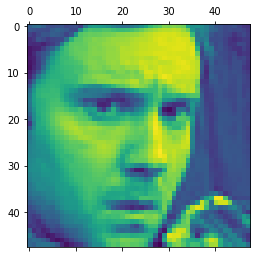

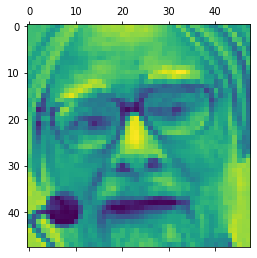

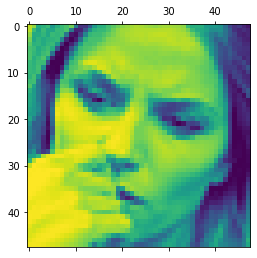

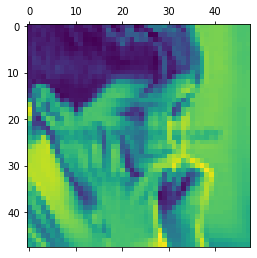

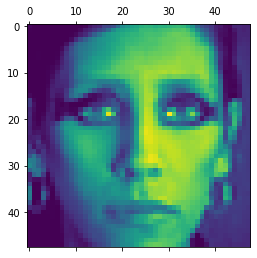

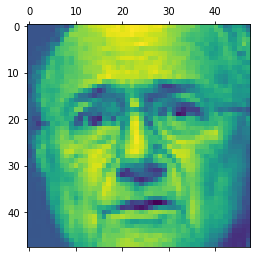

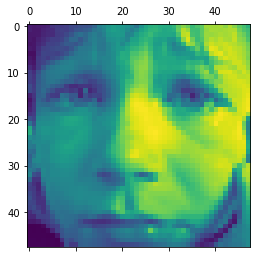

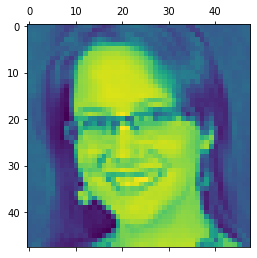

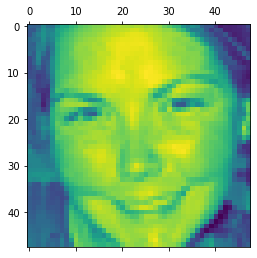

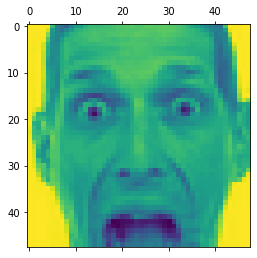

In [17]:
for i in range(10):
    plt.matshow(image_array[i])

In [18]:
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test) = train_test_split(image_array,df1,test_size=0.2,random_state=10)

In [21]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
X_train=X_train.reshape(-1,48,48,1)
X_test = X_test.reshape(-1,48,48,1)
X_train.shape
X_train_rescaled = X_train/255

27275
6819
27275
6819


In [93]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (8,8),activation='relu', input_shape=(48, 48,1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics='accuracy')

model.fit(X_train_rescaled,y_train,epochs=20)

Epoch 1/20
853/853 [==============================] - 17s 19ms/step - loss: 1.6812 - accuracy: 0.3332
Epoch 2/20
853/853 [==============================] - 18s 21ms/step - loss: 1.5374 - accuracy: 0.4046
Epoch 3/20
853/853 [==============================] - 18s 21ms/step - loss: 1.4502 - accuracy: 0.4391
Epoch 4/20
853/853 [==============================] - 18s 21ms/step - loss: 1.3810 - accuracy: 0.4676
Epoch 5/20
853/853 [==============================] - 17s 20ms/step - loss: 1.3074 - accuracy: 0.5006
Epoch 6/20
853/853 [==============================] - 19s 22ms/step - loss: 1.2285 - accuracy: 0.53340s - loss: 1.2283 - accuracy: 0.53
Epoch 7/20
853/853 [==============================] - 20s 23ms/step - loss: 1.1575 - accuracy: 0.5626
Epoch 8/20
853/853 [==============================] - 19s 22ms/step - loss: 1.0741 - accuracy: 0.5949
Epoch 9/20
853/853 [==============================] - 19s 22ms/step - loss: 0.9945 - accuracy: 0.6279
Epoch 10/20
853/853 [===========================

In [94]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

In [96]:
y_test.head(20)

3964     5
22029    2
1301     2
1717     0
16935    3
29513    2
11596    3
7109     4
15321    0
12125    2
30083    3
3943     6
33321    0
18725    6
15717    6
19936    6
29407    2
1108     0
9851     0
34441    2
Name: emotion, dtype: int64

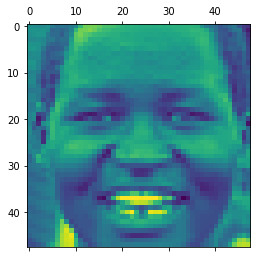

In [108]:
plt.matshow(X_test[6])

In [109]:
emotions[np.argmax(y_pred[6])]

'Happy'